# BioPUF Processing from downloaded .txt files from unit

- use the following code if a unit isn't able to transmit to RUDICS server

In [1]:
import datetime as dt
import os
import pandas as pd

In [2]:
dpath = '/Users/bell/ecoraid/ITAE/Popup_Buoys/2024/raw/0034/'
pops='0034'
pops_deploy = {
    '0034':[59.2397,-165.5972,dt.datetime(2023,8,25,7,11), 26,dt.datetime(2024,7,15,0)],
}

In [3]:
df = pd.DataFrame()

for file in sorted(os.listdir(dpath)):
    print(file)

    pdf = pd.read_csv(dpath+file,header=None,names=['time','Depth','TempProbe0','TempProbe1'])
    
    pdf['Pressure_Bar'] = pdf['Depth'].apply(lambda x: ((int(x, 16)/1000 - int('ffff',16)/1000 )) if x[0] == 'f' else int(x, 16)/1000 )
    pdf['Temp_DegC_0'] = pdf['TempProbe0'].apply(lambda x: ((int(x, 16)/1000 - int('ffff',16)/1000 )) if x[0] == 'f' else int(x, 16)/1000 )
    pdf['Temp_DegC_1'] = pdf['TempProbe1'].apply(lambda x: ((int(x, 16)/1000 - int('ffff',16)/1000 )) if x[0] == 'f' else int(x, 16)/1000 )
    pdf['time (UTC)'] = pdf['time'].apply(lambda x: ((int(x, 16))))
    pdf = pdf.set_index(pd.DatetimeIndex(pd.to_datetime(pdf['time (UTC)'],unit='s')))

    df = pd.concat([df,pdf])

LOG00000.TXT
LOG00001.TXT
LOG00002.TXT
LOG00003.TXT
LOG00004.TXT
LOG00005.TXT
LOG00006.TXT
LOG00007.TXT
LOG00008.TXT
LOG00009.TXT
LOG00010.TXT
LOG00011.TXT
LOG00012.TXT
LOG00013.TXT
LOG00014.TXT
LOG00015.TXT
LOG00016.TXT
LOG00017.TXT
LOG00018.TXT
LOG00019.TXT
LOG00020.TXT
LOG00021.TXT
LOG00022.TXT
LOG00023.TXT
LOG00024.TXT
LOG00025.TXT
LOG00026.TXT
LOG00027.TXT
LOG00028.TXT
LOG00029.TXT
LOG00030.TXT
LOG00031.TXT
LOG00032.TXT
LOG00033.TXT
LOG00034.TXT
LOG00035.TXT
LOG00036.TXT
LOG00037.TXT
LOG00038.TXT
LOG00039.TXT
LOG00040.TXT
LOG00041.TXT
LOG00042.TXT
LOG00043.TXT
LOG00044.TXT
LOG00045.TXT
LOG00046.TXT
LOG00047.TXT
LOG00048.TXT
LOG00049.TXT
LOG00050.TXT
LOG00051.TXT
LOG00052.TXT
LOG00053.TXT
LOG00054.TXT
LOG00055.TXT
LOG00056.TXT
LOG00057.TXT
LOG00058.TXT
LOG00059.TXT
LOG00060.TXT
LOG00061.TXT
LOG00062.TXT
LOG00063.TXT
LOG00064.TXT
LOG00065.TXT
LOG00066.TXT
LOG00067.TXT
LOG00068.TXT
LOG00069.TXT
LOG00070.TXT
LOG00071.TXT
LOG00072.TXT
LOG00073.TXT
LOG00074.TXT
LOG00075.TXT
LOG00076.TXT

In [4]:
df['latitude'] = pops_deploy[pops][0]
df['longitude'] = pops_deploy[pops][1]
df['timeseries_id'] = pops
df.loc[:,'measurement_type'] = 'bottom'
df.loc[pops_deploy[pops][4]:,'measurement_type'] = 'surface'

<Axes: xlabel='time (UTC)'>

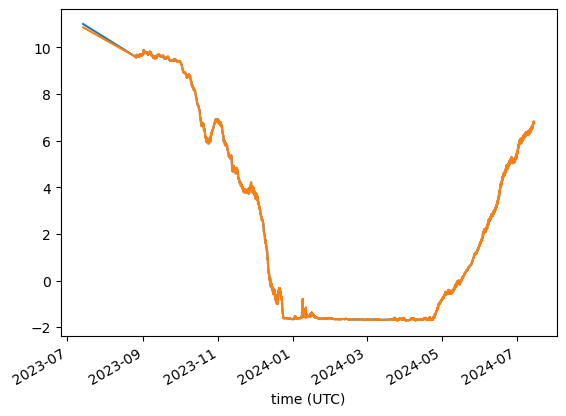

In [5]:
df.Temp_DegC_0.plot()
df.Temp_DegC_1.plot()

In [6]:
df.to_csv('pops0034.csv')

<Axes: xlabel='time (UTC)'>

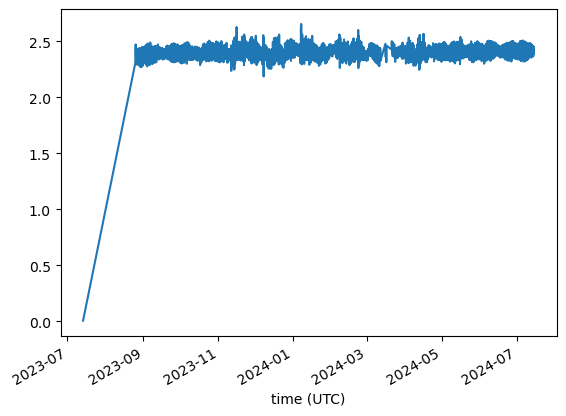

In [7]:
df.Pressure_Bar.plot()